In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",600)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv("loan.csv")
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [4]:
result_data=data.isnull().mean()*100
result_data.sort_values(ascending=False)

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

# Data Cleaning


In [5]:
data.shape

(39717, 111)

##### Dropping Columns
> Dropping the columns which has more that 90% data missing as these data will skew the analysis

In [6]:
result_data=data.isnull().mean()*100
result_data.sort_values(ascending=False)

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

In [7]:
Clean_data=data.loc[:,result_data<90]

In [8]:
result_data=Clean_data.isnull().mean()*100
result_data.sort_values(ascending=False)

mths_since_last_delinq        64.662487
desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
out_prncp                      0.000000
initial_list_status            0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_acc                      0.000000
total_pymnt_inv                0.000000
recoveries                     0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
pub_rec                        0.000000
collection_recovery_fee        0.000000
last_pymnt_amnt                0.000000


In [9]:
Clean_data.shape

(39717, 55)

#### Now, we will be analyzing the columns in detail 

In [10]:
Clean_data.loc[:,['desc','title','purpose']]

,desc,title,purpose
0,Borrower added on 12/22/11 > I need to upgra...,Computer,credit_card
1,Borrower added on 12/22/11 > I plan to use t...,bike,car
2,NaN,real estate business,small_business
3,Borrower added on 12/21/11 > to pay for prop...,personel,other
4,Borrower added on 12/21/11 > I plan on combi...,Personal,other
...,...,...,...
39712,Our current gutter system on our home is old a...,Home Improvement,home_improvement
39713,The rate of interest and fees incurred by carr...,Retiring credit card debt,credit_card
39714,NaN,MBA Loan Consolidation,debt_consolidation
39715,NaN,JAL Loan,other


>Since title is a subcategory of purpose and desc is the description of title in detail. We decided to keep purpose for our analysis and drop desc and title

In [11]:
Clean_data.drop(['desc','title'], axis=1, inplace=True)

In [12]:
print(Clean_data['chargeoff_within_12_mths'].value_counts())
print(Clean_data['collections_12_mths_ex_med'].value_counts())
print(Clean_data['tax_liens'].value_counts())

chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64
collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64
tax_liens
0.0    39678
Name: count, dtype: int64


In [13]:
#In This columns only 0 and NaN value is present so it is not contributing our analysis so we are deleting this column
Clean_data.drop(['chargeoff_within_12_mths','collections_12_mths_ex_med','tax_liens'], axis=1, inplace=True)

In [14]:
Clean_data['url']

0        https://lendingclub.com/browse/loanDetail.acti...
1        https://lendingclub.com/browse/loanDetail.acti...
2        https://lendingclub.com/browse/loanDetail.acti...
3        https://lendingclub.com/browse/loanDetail.acti...
4        https://lendingclub.com/browse/loanDetail.acti...
                               ...                        
39712    https://lendingclub.com/browse/loanDetail.acti...
39713    https://lendingclub.com/browse/loanDetail.acti...
39714    https://lendingclub.com/browse/loanDetail.acti...
39715    https://lendingclub.com/browse/loanDetail.acti...
39716    https://lendingclub.com/browse/loanDetail.acti...
Name: url, Length: 39717, dtype: object

In [15]:
# Removing url Column as well as this is not giving any insight full data
Clean_data.drop(['url'], axis=1, inplace=True)

In [16]:
Clean_data.loc[:,['pymnt_plan','initial_list_status','delinq_amnt','application_type','acc_now_delinq','policy_code']]

,pymnt_plan,initial_list_status,delinq_amnt,application_type,acc_now_delinq,policy_code
0,n,f,0,INDIVIDUAL,0,1
1,n,f,0,INDIVIDUAL,0,1
2,n,f,0,INDIVIDUAL,0,1
3,n,f,0,INDIVIDUAL,0,1
4,n,f,0,INDIVIDUAL,0,1
...,...,...,...,...,...,...
39712,n,f,0,INDIVIDUAL,0,1
39713,n,f,0,INDIVIDUAL,0,1
39714,n,f,0,INDIVIDUAL,0,1
39715,n,f,0,INDIVIDUAL,0,1


> Removing all these columns as these columns contain only single value which will not give much info regarding our agenda

In [17]:
Clean_data.drop(['pymnt_plan','initial_list_status','delinq_amnt','application_type','acc_now_delinq','policy_code'], axis=1, inplace=True)

#### Fixing missing values

In [18]:
Clean_data['revol_util'].isnull().sum()

50

In [19]:
#Since this column is important and contains only 16 missing values we are removing these row
Clean_data=Clean_data[~Clean_data['revol_util'].isnull()]

In [20]:
Clean_data["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0    37290
1.0     1673
2.0        7
Name: count, dtype: int64

In [21]:
#impute pub_rec_bankruptcies with mode
Clean_data["pub_rec_bankruptcies"].mode()[0]
Clean_data["pub_rec_bankruptcies"].fillna(Clean_data["pub_rec_bankruptcies"].mode()[0],inplace=True)

In [22]:
Clean_data.isnull().sum().sort_values(ascending=False)

mths_since_last_delinq     25645
emp_title                   2455
emp_length                  1072
last_pymnt_d                  67
last_credit_pull_d             2
last_pymnt_amnt                0
out_prncp_inv                  0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
out_prncp                      0
total_pymnt_inv                0
total_pymnt                    0
inq_last_6mths                 0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
id                             0
delinq_2yrs                    0
earliest_cr_line               0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installmen

In [23]:
Clean_data.drop(['mths_since_last_delinq','emp_title','revol_bal','funded_amnt_inv','out_prncp_inv','total_pymnt_inv','pub_rec_bankruptcies','delinq_2yrs','pub_rec','out_prncp','recoveries','collection_recovery_fee'], axis=1, inplace=True)

### Bifercating columns into segment of numerical columns, categorical columns and extra columns

In [24]:
Clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39667 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39667 non-null  int64  
 1   member_id            39667 non-null  int64  
 2   loan_amnt            39667 non-null  int64  
 3   funded_amnt          39667 non-null  int64  
 4   term                 39667 non-null  object 
 5   int_rate             39667 non-null  object 
 6   installment          39667 non-null  float64
 7   grade                39667 non-null  object 
 8   sub_grade            39667 non-null  object 
 9   emp_length           38595 non-null  object 
 10  home_ownership       39667 non-null  object 
 11  annual_inc           39667 non-null  float64
 12  verification_status  39667 non-null  object 
 13  issue_d              39667 non-null  object 
 14  loan_status          39667 non-null  object 
 15  purpose              39667 non-null  obje

## Standardizing Values 

In [25]:
datetime_cols = Clean_data.loc[:,['earliest_cr_line','last_pymnt_d','issue_d']]

In [26]:
#converting the date into datetime format
for x in datetime_cols:
    Clean_data[x]=pd.to_datetime(Clean_data[x], format='%b-%y')

In [27]:
#Removing the % and converting it into float datatype
Clean_data['revol_util'] =Clean_data['revol_util'].apply(lambda x : float(x[:-1]))
Clean_data['int_rate'] =Clean_data['int_rate'].apply(lambda x : float(x[:-1]))

In [28]:
Clean_data['loan_issued_year']=Clean_data['issue_d'].dt.year
Clean_data['earliest_cr_line_year']=Clean_data['earliest_cr_line'].dt.year
Clean_data=Clean_data[Clean_data['earliest_cr_line'].dt.year<=2011]

## Outlier detection and handling

<Axes: >

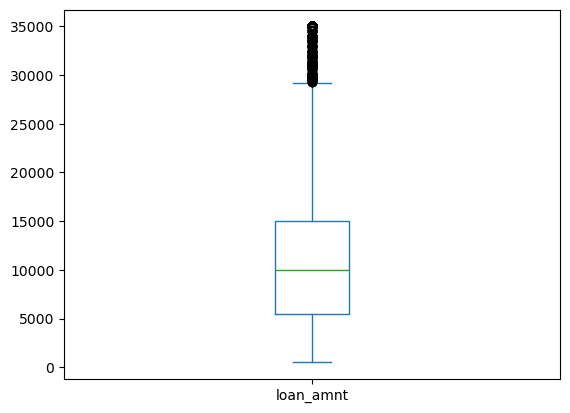

In [29]:
Clean_data['loan_amnt'].plot.box()

{'whiskers': [<matplotlib.lines.Line2D at 0x25e529d7d10>,
 'caps': [<matplotlib.lines.Line2D at 0x25e529e5590>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e529d7110>],
 'medians': [<matplotlib.lines.Line2D at 0x25e529e6b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e529e7650>],
 'means': []}

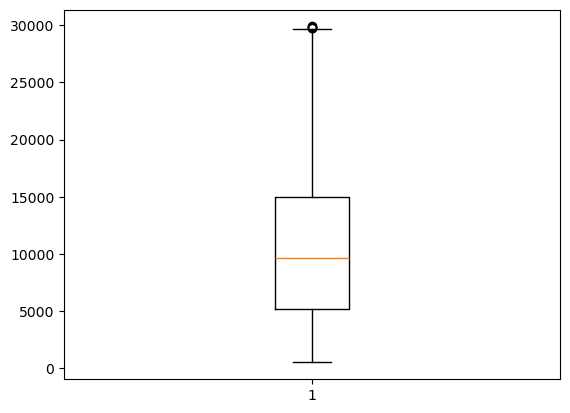

In [30]:
df= Clean_data[Clean_data['loan_amnt']<30000]
plt.boxplot(df['loan_amnt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e52a4b910>,
 'caps': [<matplotlib.lines.Line2D at 0x25e52a55150>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e52a4ab90>],
 'medians': [<matplotlib.lines.Line2D at 0x25e52a56690>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e52a57190>],
 'means': []}

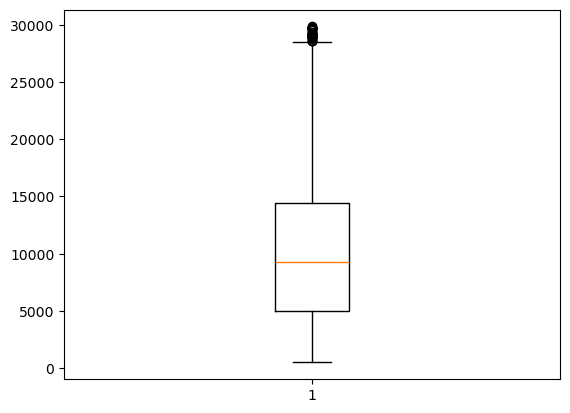

In [31]:
plt.boxplot(df['funded_amnt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e51e695d0>,
 'caps': [<matplotlib.lines.Line2D at 0x25e51e77250>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e51e75cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x25e51e80890>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e51e81350>],
 'means': []}

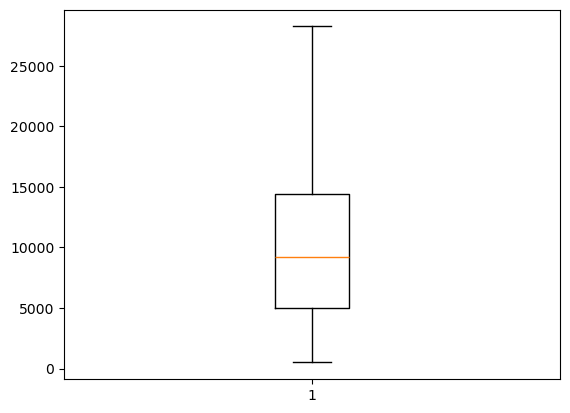

In [32]:
df= df[df['funded_amnt']<28500]
plt.boxplot(df['funded_amnt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e51ed9890>,
 'caps': [<matplotlib.lines.Line2D at 0x25e51edafd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e52a4b690>],
 'medians': [<matplotlib.lines.Line2D at 0x25e51ee85d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e51ee9010>],
 'means': []}

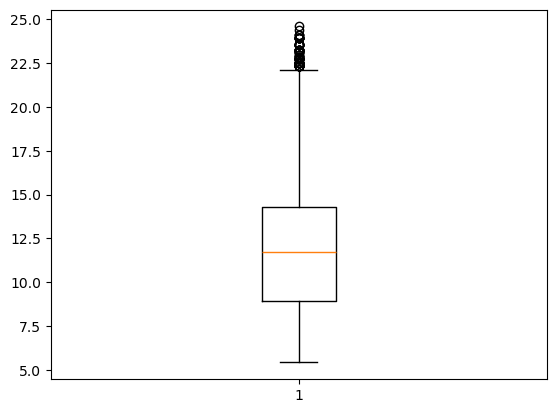

In [33]:
plt.boxplot(df['int_rate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e51f4e8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x25e51f4ffd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e51f4dc50>],
 'medians': [<matplotlib.lines.Line2D at 0x25e52a99510>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e52a9a0d0>],
 'means': []}

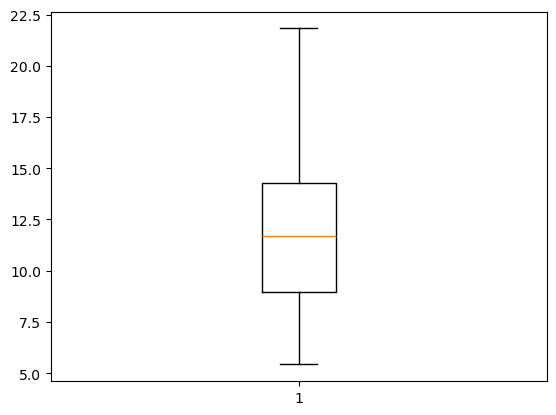

In [34]:
df= df[df['int_rate']<22]
plt.boxplot(df['int_rate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e52afdf90>,
 'caps': [<matplotlib.lines.Line2D at 0x25e52aff850>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e52afd2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x25e52b0cd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e52b0d890>],
 'means': []}

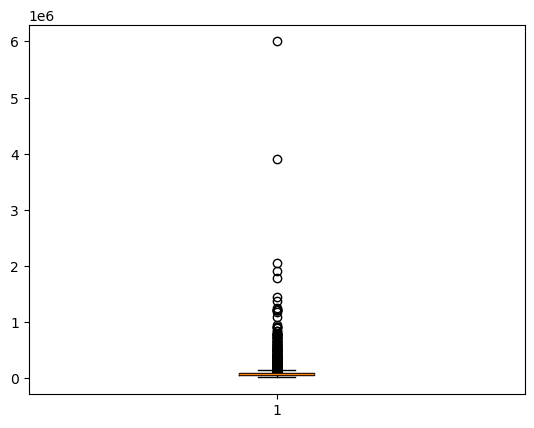

In [35]:
plt.boxplot(df['annual_inc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e52b67410>,
 'caps': [<matplotlib.lines.Line2D at 0x25e52b78cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e52b667d0>],
 'medians': [<matplotlib.lines.Line2D at 0x25e52b7a1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e52b7ac90>],
 'means': []}

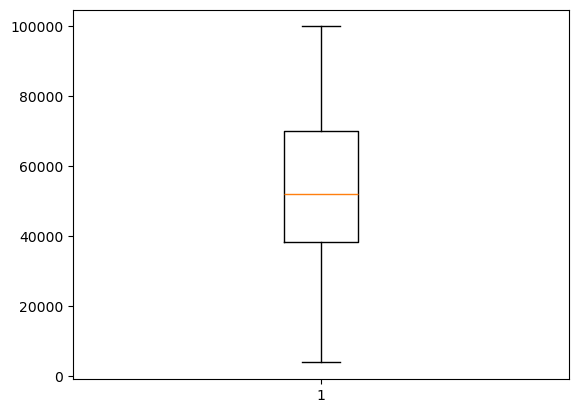

In [36]:
df=df[df['annual_inc']<=100000]
plt.boxplot(df['annual_inc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e53f29e10>,
 'caps': [<matplotlib.lines.Line2D at 0x25e53f2b610>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e53f29290>],
 'medians': [<matplotlib.lines.Line2D at 0x25e53f3cc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e53f3d790>],
 'means': []}

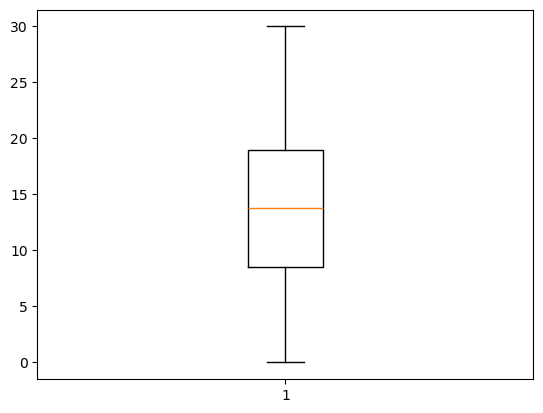

In [37]:
plt.boxplot(df['dti'])

#### Checking if the driver variables are having outliers by comparing mean and median

In [42]:
print(df['annual_inc'].median())
print(df['annual_inc'].mean())

52000.0
54402.46436599771


In [43]:
print(df['int_rate'].median())
print(df['int_rate'].mean())

11.71
11.820078346290604


In [44]:
print(df['loan_amnt'].median())
print(df['loan_amnt'].mean())

8600.0
9889.793135659616


#### Since mean is approximately equal to median, there are no outliers

# Univariate Analysis

<Axes: xlabel='annual_inc', ylabel='Count'>

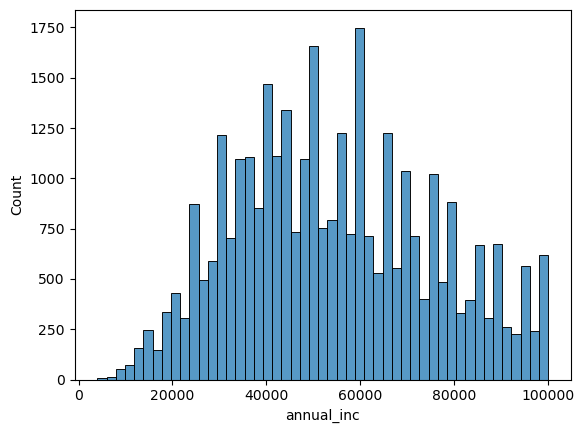

In [39]:
sns.histplot(df['annual_inc']) 

###### ASSUMPTION 1- sudden spikes here maybe indicate that person having business and taking more loans
###### ASSUMPTION 2- maybe these are because some interest rate criteria increase or decrease so that customer is going for more loan amount..

In [40]:
df['loan_status'].value_counts()

loan_status
Fully Paid     27534
Charged Off     4807
Current          845
Name: count, dtype: int64

#### Segregating data based on loan_status into fully paid, charged off, current

In [41]:
data_fullypaid=df[df['loan_status']=='Fully Paid']
data_chargedoff=df[df['loan_status']=='Charged Off']
data_current=df[df['loan_status']=='Current']

### Univariate analysis on 'Charged Off' loans

<Axes: xlabel='percentage', ylabel='purpose'>

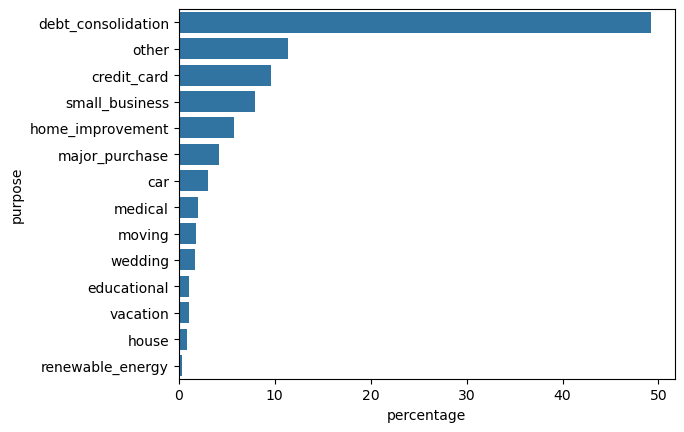

In [56]:
data_percent = data_chargedoff['purpose'].value_counts(normalize=True) * 100
data_percent_df = data_percent.reset_index()
data_percent_df.columns = ['purpose', 'percentage']
sns.barplot(data_percent_df,y='purpose',x='percentage')

#### It seems that aprrox 48% customer who have taken loan for debt consolidation are mostly defaulted

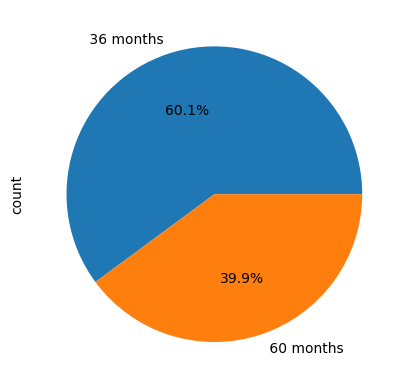

In [57]:
data_term=data_chargedoff['term'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

#### Customer taking loans for less period (36 months) are most likly to default

<Axes: xlabel='percentage', ylabel='home_ownership'>

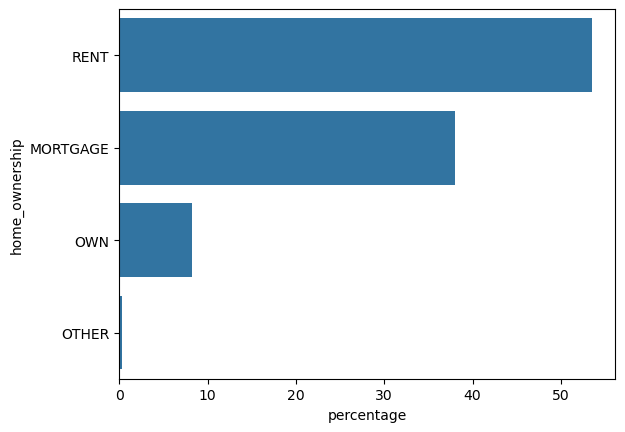

In [58]:
data_percent = data_chargedoff['home_ownership'].value_counts(normalize=True) * 100

# Convert to DataFrame for plotting
data_percent_df = data_percent.reset_index()
data_percent_df.columns = ['home_ownership', 'percentage']
sns.barplot(data_percent_df,y='home_ownership',x='percentage')

#### Customer who are renting are becoming dafaulters as compare to Customer who have mortgae and Own houses

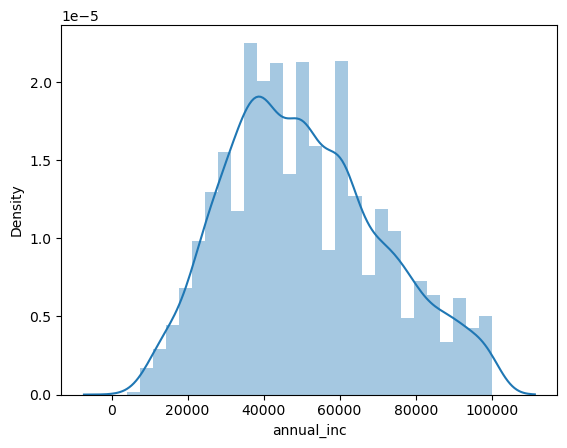

In [59]:
sns.distplot(data_chargedoff['annual_inc'])
plt.show()

#### Customers in range of 30k-50k annual income are defaulters

In [60]:
(data_chargedoff['addr_state'].value_counts()*100)/data_chargedoff['addr_state'].shape[0]

addr_state
CA    19.575619
FL     9.070106
NY     8.695652
TX     5.200749
NJ     4.992719
GA     3.931766
IL     3.557312
PA     3.307676
VA     2.995631
OH     2.912419
MA     2.850010
MD     2.621177
AZ     2.288330
WA     2.246724
MO     2.205118
NC     2.080300
NV     1.872270
MI     1.872270
CO     1.789058
CT     1.768255
MN     1.560225
OR     1.310589
SC     1.144165
WI     1.060953
LA     0.936135
AL     0.936135
KY     0.873726
OK     0.790514
UT     0.686499
NM     0.603287
HI     0.540878
KS     0.540878
AR     0.499272
RI     0.478469
WV     0.416060
NH     0.332848
SD     0.249636
AK     0.249636
DC     0.228833
DE     0.228833
MT     0.166424
VT     0.104015
WY     0.062409
NE     0.062409
MS     0.041606
TN     0.041606
ID     0.020803
Name: count, dtype: float64

#### People from CA state are  approx 10% more defaulters as compare to 2nd most defaulter state

<Axes: xlabel='open_acc', ylabel='count'>

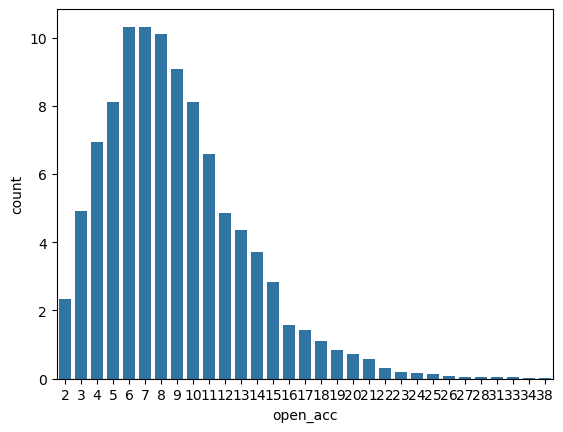

In [61]:
data_openacc=(data_chargedoff['open_acc'].value_counts()*100)/data_chargedoff['open_acc'].shape[0]

sns.barplot(data_openacc)

#### this is left skewed means creditlines are not the factor for defaulters

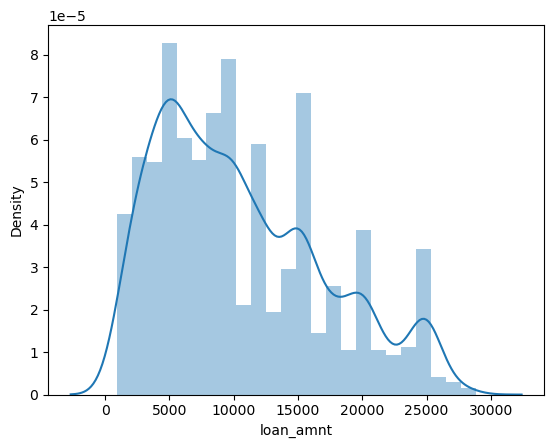

In [62]:
sns.distplot(data_chargedoff['loan_amnt'])
plt.show()

#### customers are taking small amount loans and they are getting defaulted

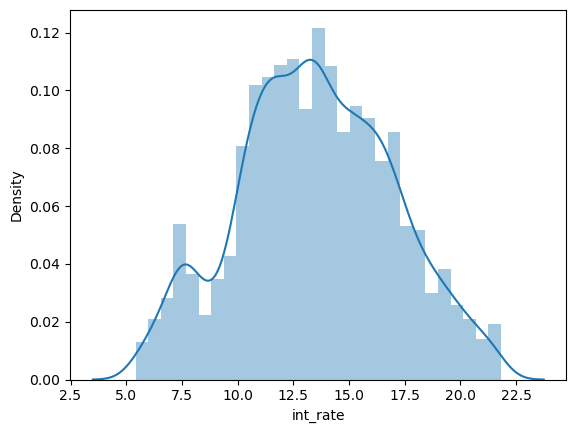

In [63]:
sns.distplot(data_chargedoff['int_rate'])
plt.show()

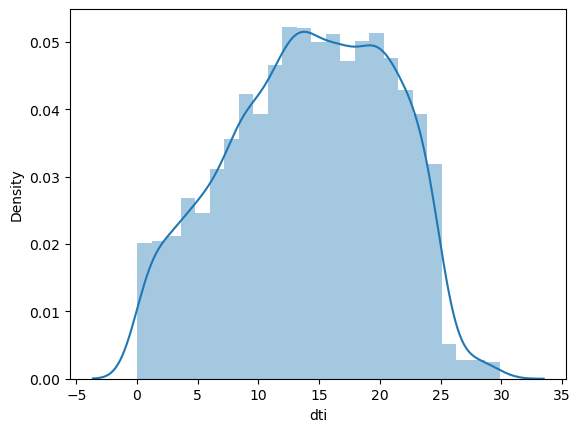

In [66]:
sns.distplot(data_chargedoff['dti'])
plt.show()

<Axes: xlabel='grade', ylabel='count'>

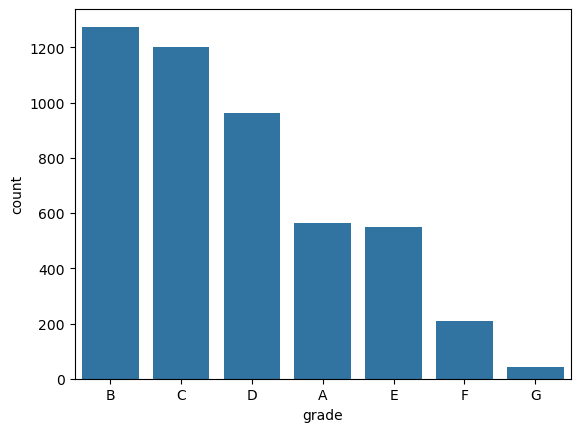

In [97]:
sns.countplot(x=data_chargedoff['grade'],order=data_chargedoff['grade'].value_counts().index)

#### customer having loans in grade B,C,D are more likey to default

### Univariate analysis on 'Fully paid' loans

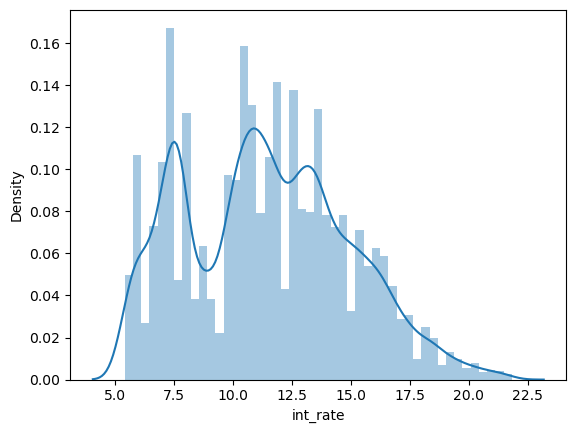

In [65]:
sns.distplot(data_fullypaid['int_rate'])
plt.show()

#### After comparing interest rate of both fully paid loans and charged off loans customer being charged 5%-8% interest rate are more likly to pay back the loans as compare to customer being charged 12%-15% interest rate

<Axes: xlabel='percentage', ylabel='purpose'>

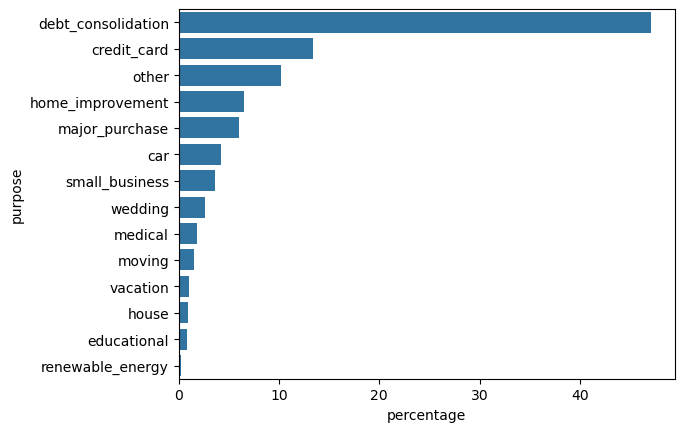

In [67]:
data_percent = data_fullypaid['purpose'].value_counts(normalize=True) * 100
data_percent_df = data_percent.reset_index()
data_percent_df.columns = ['purpose', 'percentage']
sns.barplot(data_percent_df,y='purpose',x='percentage')

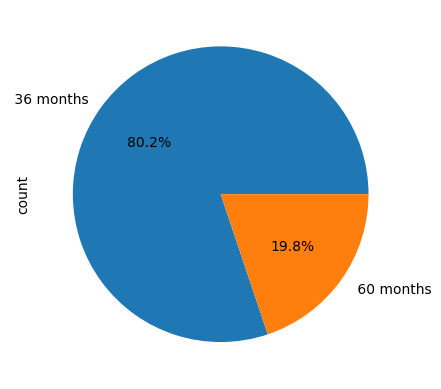

In [69]:
data_term=data_fullypaid['term'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

#### fully paid customers have a ratio of approimately 80:20 where as customers who have charged off have a ratio of 60:40 for term

<Axes: xlabel='percentage', ylabel='home_ownership'>

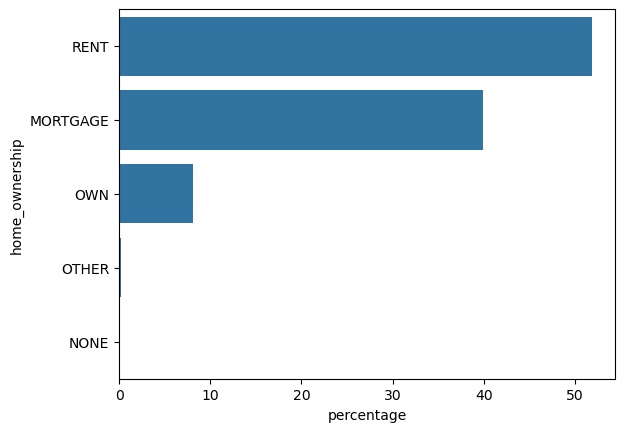

In [72]:
data_percent = data_fullypaid['home_ownership'].value_counts(normalize=True) * 100

# Convert to DataFrame for plotting
data_percent_df = data_percent.reset_index()
data_percent_df.columns = ['home_ownership', 'percentage']
sns.barplot(data_percent_df,y='home_ownership',x='percentage')

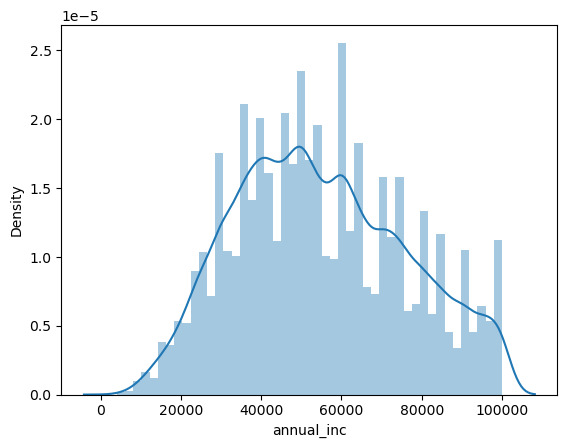

In [74]:
sns.distplot(data_fullypaid['annual_inc'])
plt.show()

In [75]:
(data_fullypaid['addr_state'].value_counts()*100)/data_fullypaid['addr_state'].shape[0]

addr_state
CA    17.182393
NY     9.766107
FL     7.125735
TX     6.795235
NJ     4.361880
PA     4.104017
IL     3.882473
GA     3.479335
VA     3.439384
MA     3.413961
OH     3.268686
MD     2.466042
AZ     2.193651
WA     2.150069
CO     2.106487
NC     1.972107
MI     1.852255
CT     1.823200
MO     1.750563
MN     1.674294
SC     1.231205
AL     1.227573
WI     1.202150
OR     1.183991
LA     1.147672
NV     1.144040
KY     0.857122
OK     0.773589
KS     0.704583
AR     0.675528
UT     0.650105
DC     0.555677
RI     0.537517
WV     0.490303
NM     0.483039
NH     0.421297
HI     0.417665
DE     0.312341
WY     0.254231
MT     0.236072
SD     0.174330
AK     0.170698
VT     0.159802
MS     0.050846
TN     0.047214
IN     0.032687
IA     0.018159
ID     0.014527
ME     0.010896
NE     0.007264
Name: count, dtype: float64

<Axes: xlabel='open_acc', ylabel='count'>

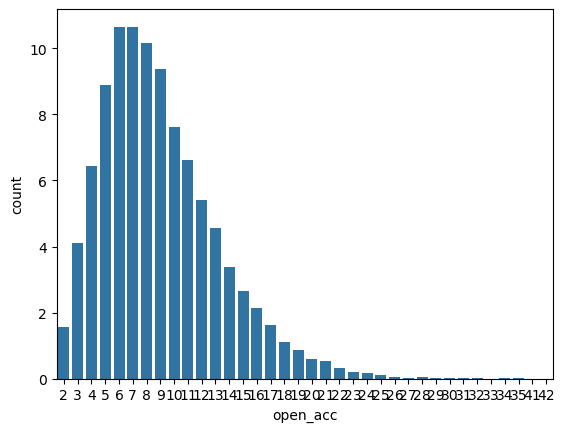

In [76]:
data_openacc=(data_fullypaid['open_acc'].value_counts()*100)/data_fullypaid['open_acc'].shape[0]

sns.barplot(data_openacc)

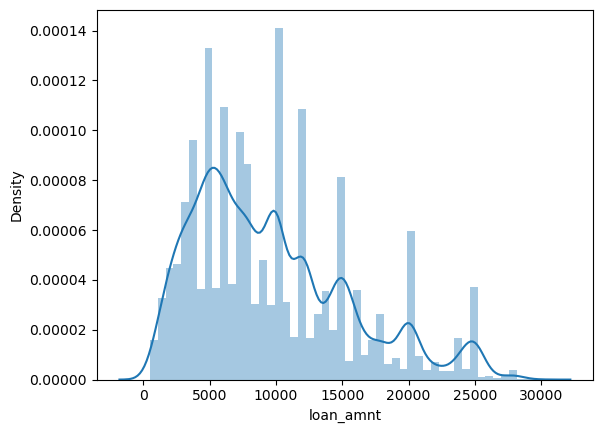

In [77]:
sns.distplot(data_fullypaid['loan_amnt'])
plt.show()

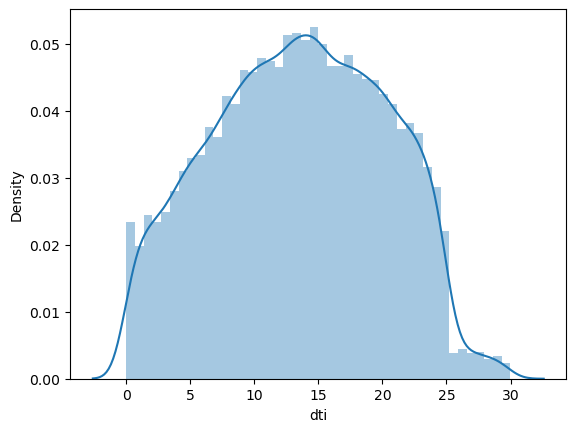

In [78]:
sns.distplot(data_fullypaid['dti'])
plt.show()

#### DTI is not a good discriminator

<Axes: xlabel='grade', ylabel='count'>

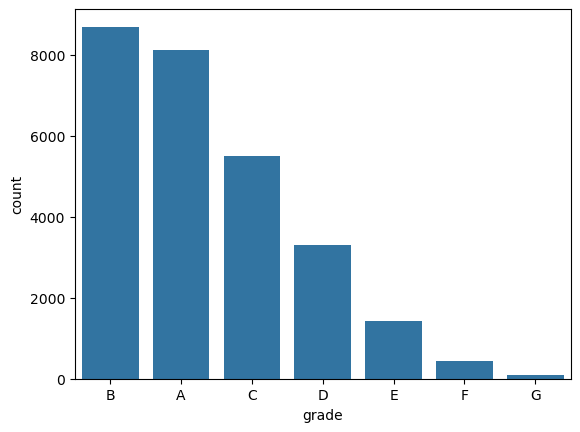

In [98]:
sns.countplot(x=data_fullypaid['grade'],order=data_fullypaid['grade'].value_counts().index)

#### customer having grade A are likey to pay off the loan

## Bivarite analysis

<Axes: xlabel='loan_amnt', ylabel='purpose'>

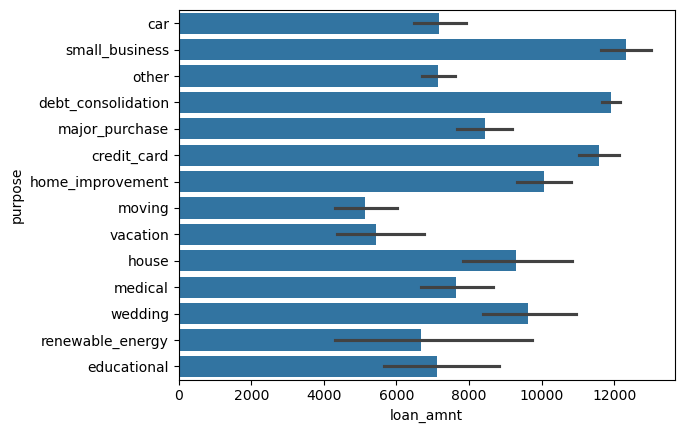

In [80]:
sns.barplot(data_chargedoff,y='purpose', x='loan_amnt')

<Axes: xlabel='loan_amnt', ylabel='purpose'>

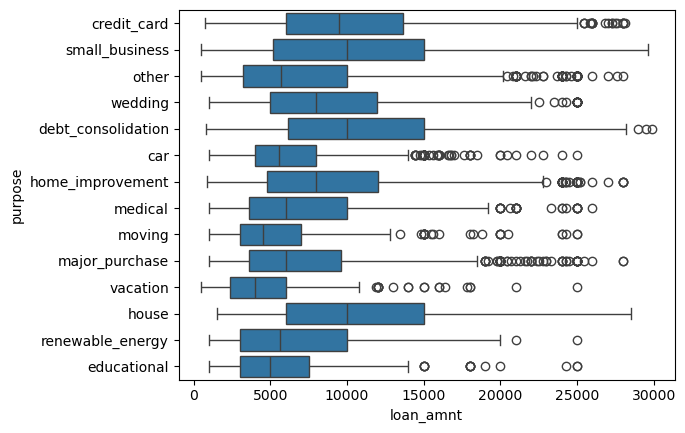

In [82]:
sns.boxplot(data_fullypaid,y='purpose', x='loan_amnt')

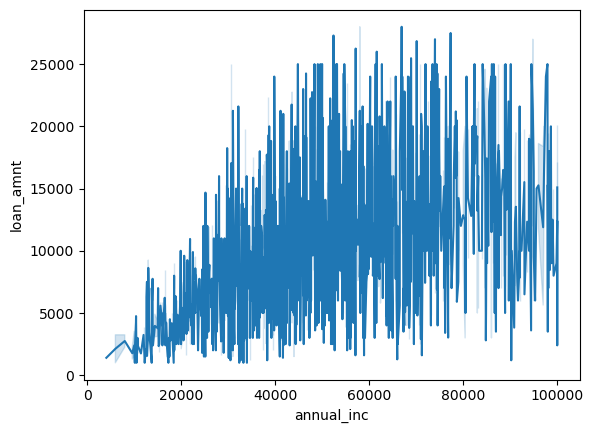

In [83]:
sns.lineplot(data=data_chargedoff,x='annual_inc',y='loan_amnt')
plt.show()

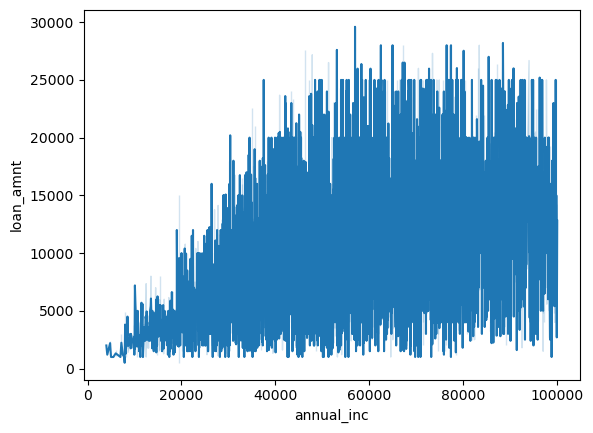

In [84]:
sns.lineplot(data=data_fullypaid,x='annual_inc',y='loan_amnt')
plt.show()

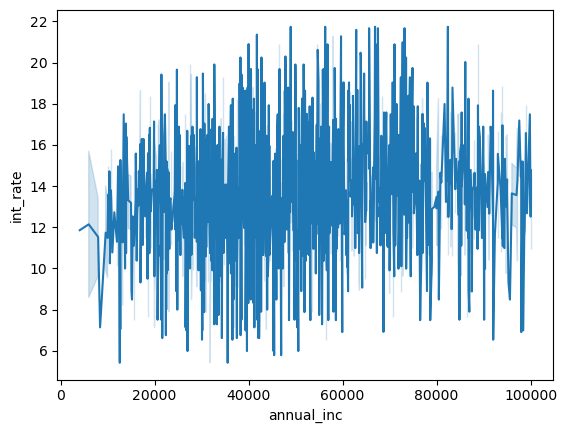

In [85]:
sns.lineplot(data=data_chargedoff,x='annual_inc',y='int_rate')
plt.show()

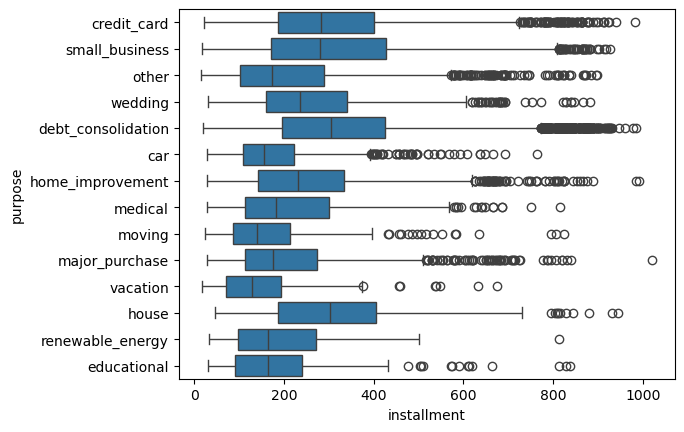

In [88]:
sns.boxplot(data_fullypaid,y='purpose', x='installment')
plt.show()

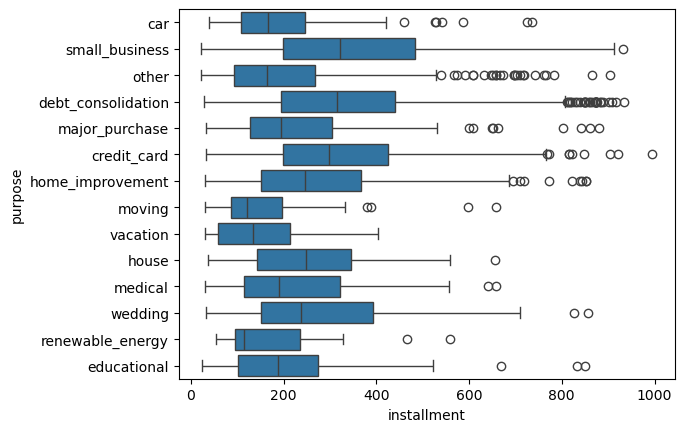

In [89]:
sns.boxplot(data_chargedoff,y='purpose', x='installment')
plt.show()

<Axes: xlabel='installment', ylabel='emp_length'>

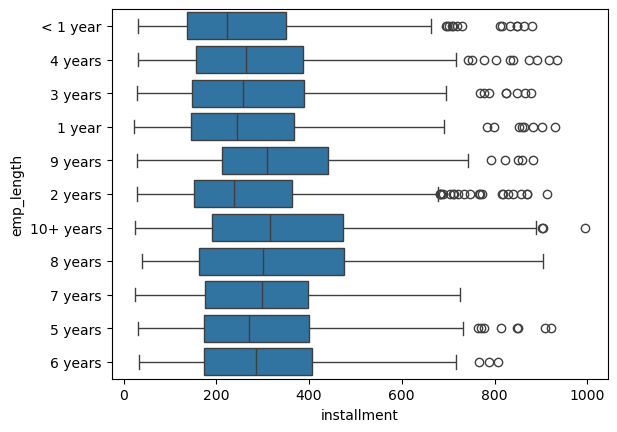

In [92]:
sns.boxplot(data_chargedoff,y='emp_length', x='installment')

<Axes: xlabel='installment', ylabel='emp_length'>

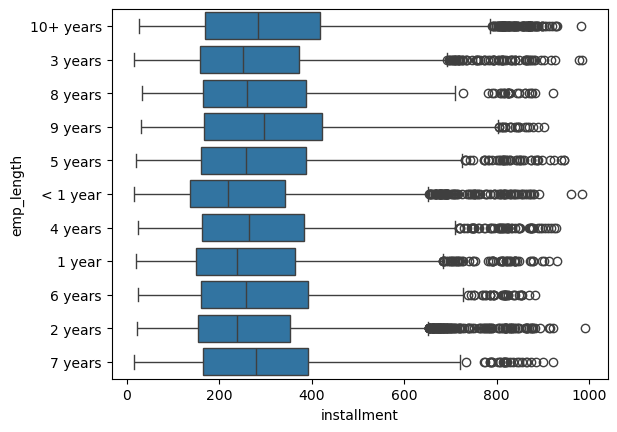

In [93]:
sns.boxplot(data_fullypaid,y='emp_length', x='installment')

<Axes: xlabel='int_rate', ylabel='emp_length'>

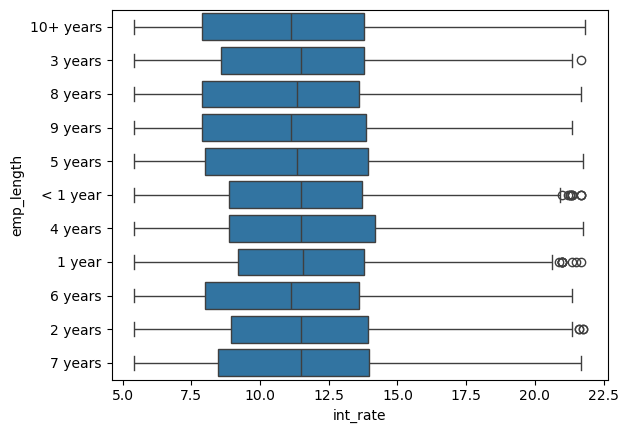

In [94]:
sns.boxplot(data_fullypaid,y='emp_length', x='int_rate')

<Axes: xlabel='int_rate', ylabel='emp_length'>

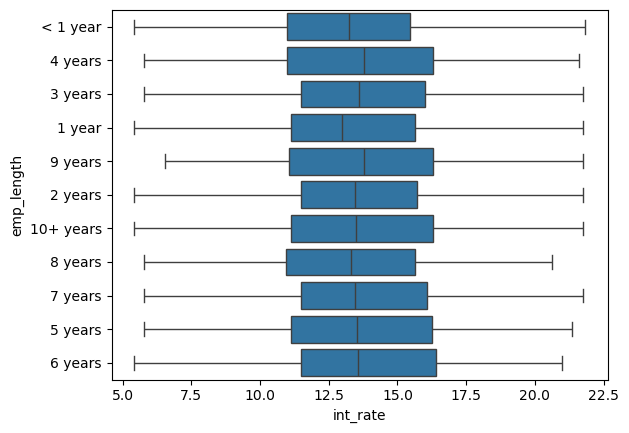

In [95]:
sns.boxplot(data_chargedoff,y='emp_length', x='int_rate')

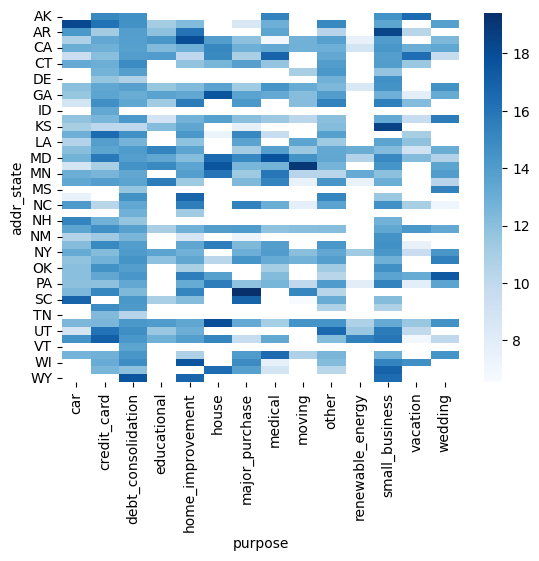

In [86]:
pt_intrate=pd.pivot_table(data=data_chargedoff, values='int_rate', index='addr_state', columns='purpose')
sns.heatmap(pt_intrate,cmap='Blues')
plt.show()

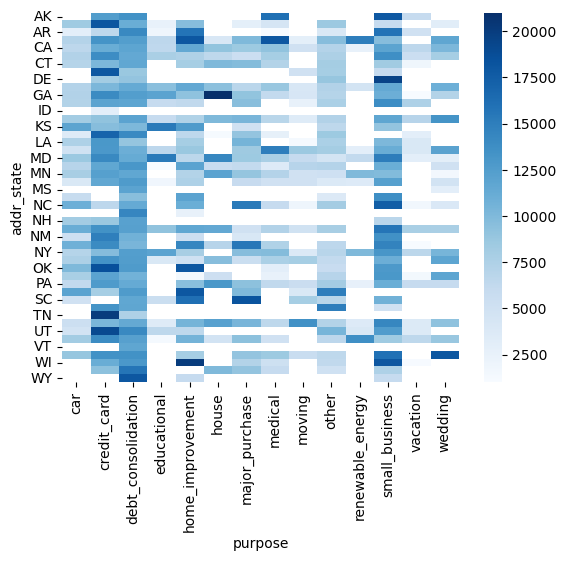

In [87]:
pt_loanamont=pd.pivot_table(data=data_chargedoff, values='loan_amnt', index='addr_state', columns='purpose')
sns.heatmap(pt_loanamont,cmap='Blues')
plt.show()